<a href="https://colab.research.google.com/github/dkaikas/AI-in-Cybersecurity/blob/main/pps_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Βήμα 1: Εγκατάσταση της βιβλιοθήκης
!pip install -U ppscore
!pip install --upgrade --force-reinstall pandas

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.3 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is

In [ ]:
# Βήμα 2: Εισαγωγή των βιβλιοθηκών
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Βήμα 3: Φόρτωση των δεδομένων από το URL
df=pd.read_csv("https://media.githubusercontent.com/media/kdemertzis/EKPA/main/Data/Ransomware.csv",sep='|')

In [ ]:
df_numeric = df.select_dtypes(include=np.number)

In [ ]:
pps.predictors(df_numeric, "legitimate")
pps.matrix(df_numeric)


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Machine,Machine,1.00000,predict_itself,True,None,0.0000,1.000000e+00,None
1,Machine,SizeOfOptionalHeader,0.99521,regression,True,mean absolute error,2.0048,9.603688e-03,DecisionTreeRegressor()
2,Machine,Characteristics,0.00000,regression,True,mean absolute error,4283.2826,5.331614e+03,DecisionTreeRegressor()
3,Machine,MajorLinkerVersion,0.00000,regression,True,mean absolute error,1.7612,1.899711e+00,DecisionTreeRegressor()
4,Machine,MinorLinkerVersion,0.00000,regression,True,mean absolute error,3.8598,6.516602e+00,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
3020,legitimate,ResourcesMinSize,0.00000,regression,True,mean absolute error,830.1086,1.454941e+03,DecisionTreeRegressor()
3021,legitimate,ResourcesMaxSize,0.00000,regression,True,mean absolute error,246876.1302,4.170181e+05,DecisionTreeRegressor()
3022,legitimate,LoadConfigurationSize,0.00000,regression,True,mean absolute error,544498.1538,1.090939e+06,DecisionTreeRegressor()
3023,legitimate,VersionInformationSize,0.00000,regression,True,mean absolute error,4.2926,4.757744e+00,DecisionTreeRegressor()


<Axes: xlabel='x', ylabel='ppscore'>

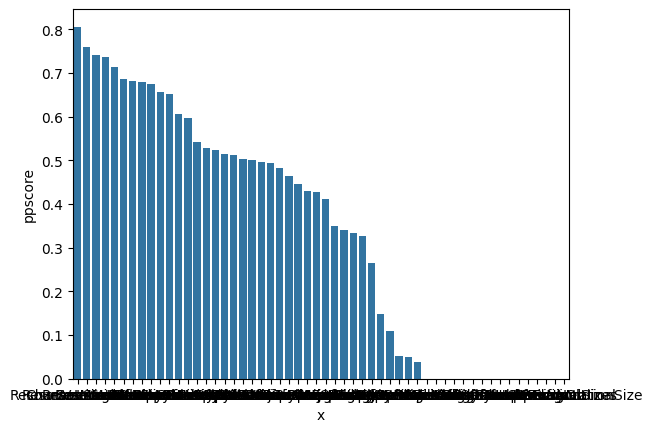

In [ ]:
import seaborn as sns
predictors_df = pps.predictors(df_numeric, y="legitimate")
sns.barplot(data=predictors_df, x="x", y="ppscore")

<Axes: xlabel='x', ylabel='y'>

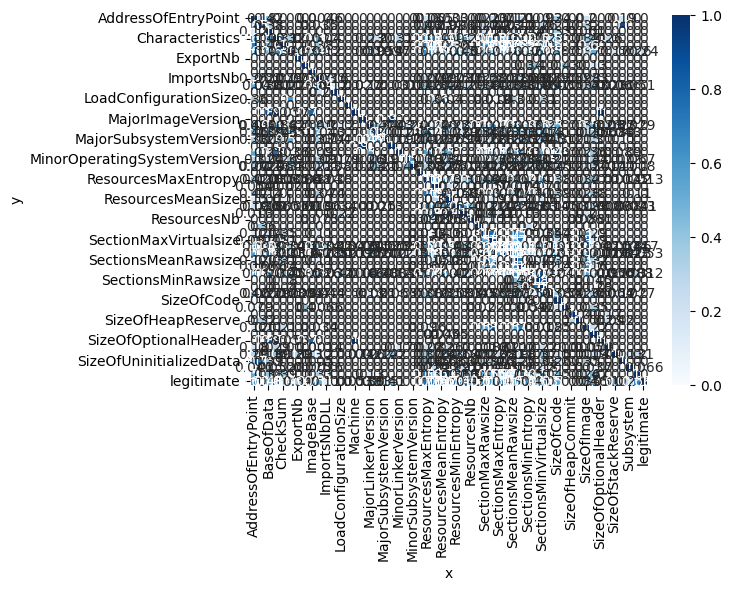

In [ ]:
import seaborn as sns
matrix_df = pps.matrix(df_numeric)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)